#### imports


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os

df= pd.read_csv(os.path.join(os.getcwd(), 'datasets\SVM_Data.csv'))

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape


(400, 3)

In [6]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [9]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [ ]:
# ig will neeed standardization later (do after splitting)

#### vizualisations

In [12]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

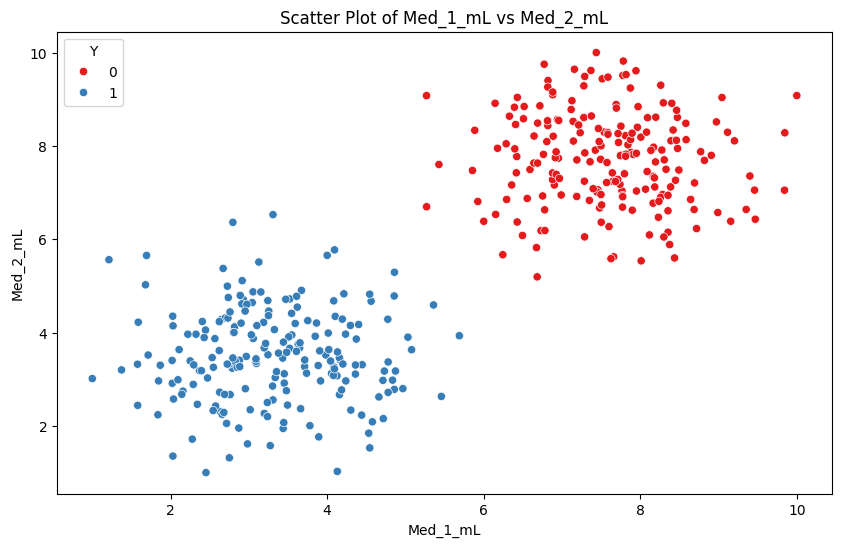

In [ ]:
# scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='Set1')     ## can add style='Virus Present'
plt.title('Scatter Plot of Med_1_mL vs Med_2_mL')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend(title='Y')
plt.show()



# we was able to did this visualization because we have two features only and one target variable.


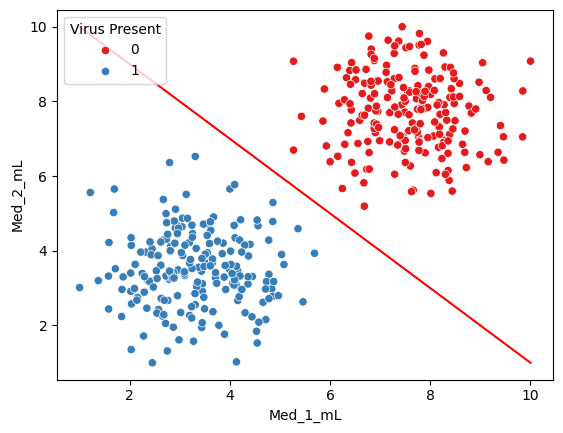

In [ ]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='Set1')     ## can add style='Virus Present'

m=-1  # slope of the decision boundary (-ve)
b=11  # y-intercept
x = np.linspace(1, 10, 100)  # Generate 100 points between 1 and 10
y = m * x + b  

plt.plot(x, y, color='red', label='Decision Boundary')

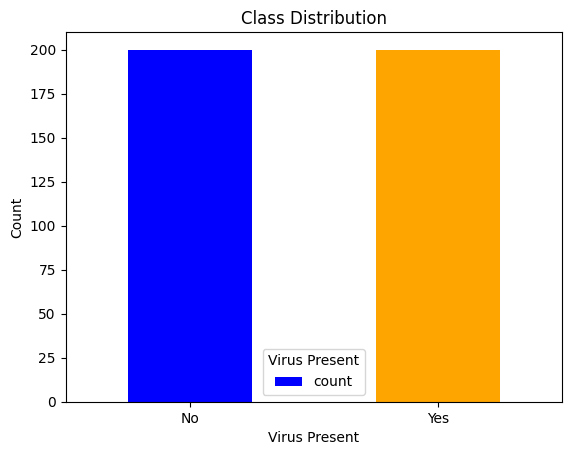

In [21]:
# check on balance of classes
df['Virus Present'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Virus Present')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Virus Present')
plt.show()

#### Prepare data and splitting 

In [57]:
X=df.drop(columns="Virus Present", axis=1)
y=df["Virus Present"]

In [58]:
# split to training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# check after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

#### feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


#### train SVM for clf

In [64]:
from sklearn.svm import SVC
# Create a Support Vector Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

#### Evaluation

In [65]:
# Scale the test set using the same scaler
X_test_scaled = scaler.transform(X_test)
# Predict on the test set
y_pred = svm_model.predict(scaler.transform(X_test))
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



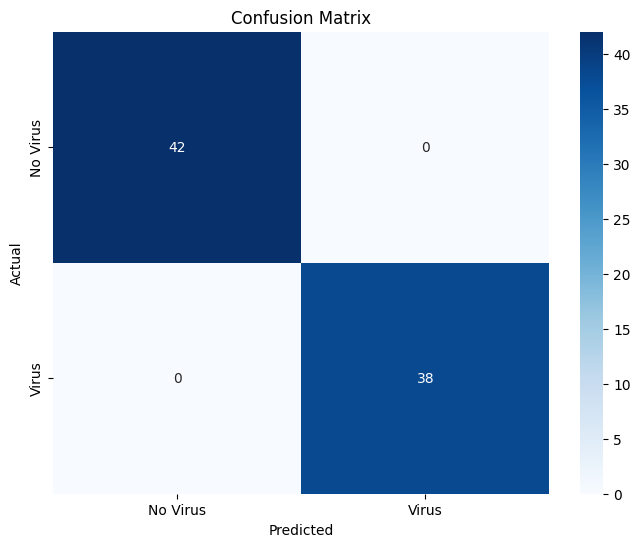

In [78]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Virus', 'Virus'], yticklabels=['No Virus', 'Virus'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### vizualise boundry lline 

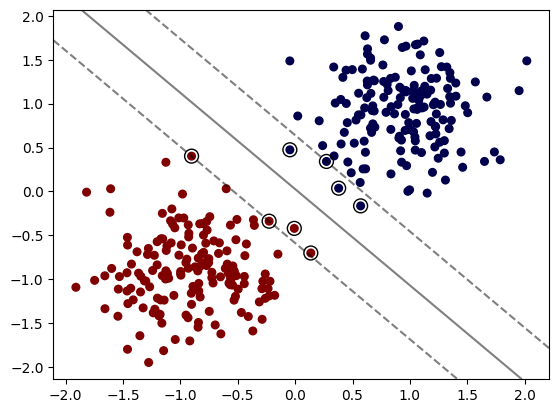

In [77]:
from svm_margin_plot import plot_svm_boundary
# Plot the SVM decision boundary and margin
import pandas as pd

# Convert X_train_scaled (NumPy array) to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['Med_1_mL', 'Med_2_mL'])

# Convert y_train to pandas Series (if it's a NumPy array)
y_train_series = pd.Series(y_train)

# Now call the function with these
plot_svm_boundary(svm_model, X_train_scaled_df, y_train_series)



#### hyper-parameters tunning

In [79]:
svm_model_= SVC()

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model_, param_grid)
# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [83]:
# best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


###  Polynomial Kernel

In [52]:
# try polynomial kernel
svm_model_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
# Fit the model on the training data
svm_model_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

c:\Users\laphouse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


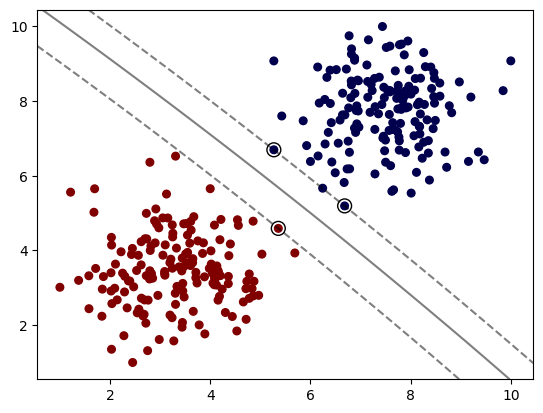

In [53]:
plot_svm_boundary(svm_model_poly, X_train, y_train)

### RBF Kernel

c:\Users\laphouse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


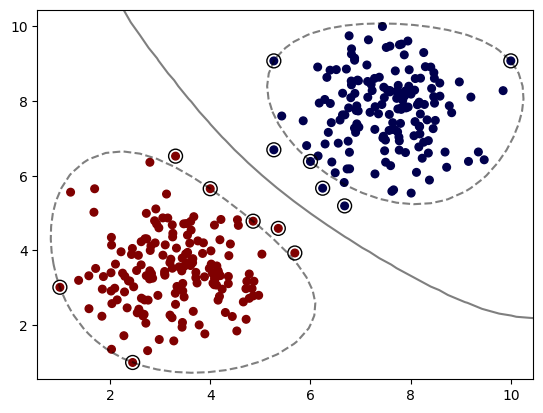

In [66]:
# try radial basis function (RBF) kernel

svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# Fit the model on the training data
svm_model_rbf.fit(X_train, y_train)
plot_svm_boundary(svm_model_rbf, X_train, y_train)
